# Risk Prediction using LightGBM
1.   Install LightGBM and Load Libraries
2.   Data Collection
3.   Exploratory Data Analysis (EDA)
4.   Data Preprocessing
5.   Model Training and Validation
6.   Testing and Deployment











##1. Install LightGBM and Load Libraries

In [46]:
!pip install lightgbm

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##2. Data Collection

###Load Dataset
Firstly, we will load the dataset into a variable called `loan_df`. The dataset is the csv file `loan.csv` located at the same directory as the notebook file.

In [48]:
loan_df = pd.read_csv("/content/loan.csv")

In [49]:
loan_df.replace({'NA': np.nan, '': np.nan}, inplace=True)
boolean_column = ['originated', 'approved']
loan_df[boolean_column] = loan_df[boolean_column].replace({True: 1, False: 0})

##3. Exploratory Data Analysis (EDA)
After the dataset has been loaded into the `loan_df` variable, we will peek at the first and last five items of the DataFrame `loan_df`.

In [50]:
loan_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,0,NaN,0.0,0,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,1,2016-01-20T15:49:18.846000,0.0,1,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,0,NaN,0.0,0,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,0,NaN,0.0,0,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,0,NaN,0.0,0,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [51]:
loan_df.tail()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
577677,LL-I-12122269,801262d04720d32040612759857f4147,B,590.0,2016-11-08T17:32:33.554000,0,NaN,0.0,0,0,Withdrawn Application,400.0,1292.41,NV,bvMandatory,3,NaN,58220cdde4b051c58d919c1f,1
577678,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,490.0,2017-01-24T22:20:59.818000,0,NaN,0.0,0,0,Withdrawn Application,1000.0,2592.39,MO,lead,25,NaN,5887d349e4b08f249ac45e2f,1
577679,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,590.0,2016-02-02T03:05:47.797000,0,NaN,0.0,0,0,Withdrawn Application,300.0,844.75,IN,bvMandatory,6,NaN,550b1f59e4b0d4592e28c84e,1
577680,LL-I-01253468,c3b35307cb36116bf59574f9138d3dad,B,550.0,2015-05-21T20:19:49.639000,0,NaN,0.0,0,0,Withdrawn Application,300.0,770.80,OH,organic,6,NaN,NaN,0
577681,LL-I-04733921,dc0a43b16c037ee5d0142daebb5db83a,I,590.0,2015-11-17T22:04:20.862000,0,NaN,0.0,0,0,Rejected,400.0,1214.63,OH,bvMandatory,6,NaN,564f801ae4b05a02bef951e8,1


Next, we will get a quick description of all attributes in the DataFrame `loan_df`, including the index, columns, non-null values, dtype and memory usage.

In [52]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  int64  
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  int64  
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

After we get the basic information about the DataFrame `loan_df`, we will analyze the numerical attributes.

In [53]:
loan_df.describe()

,apr,originated,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577682.000000,577658.000000,577682.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.079639,0.037887,0.069305,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.270734,0.333366,0.253972,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,1.000000,21.000000,1.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


To create a representation of the distribution of data, we will plot the histogram of the DataFrame's columns with the number of bins is set to 50 and figure size is set to (20, 15).

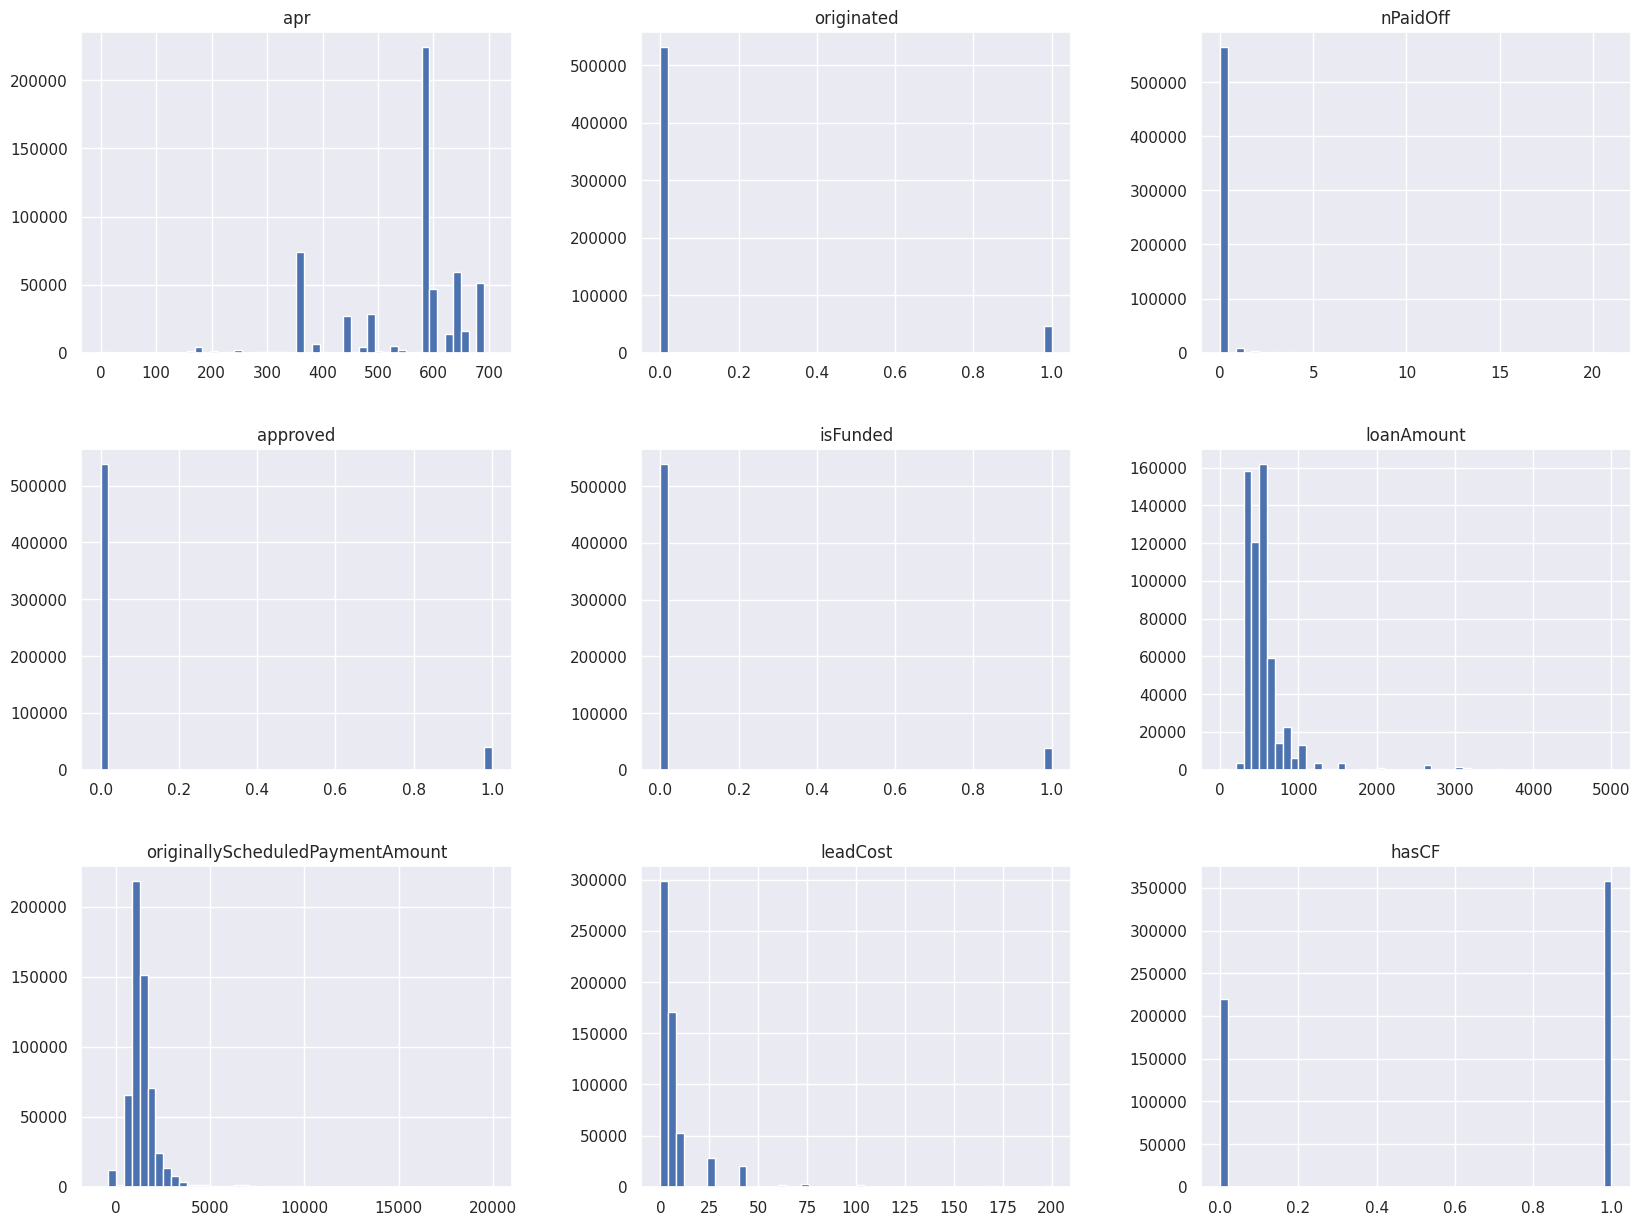

In [54]:
loan_df.hist(bins = 50, figsize = (20, 15))
plt.show()

Based on the histograms above, we can observe some issues. The following code plots the line within the histogram to see whether the data distribution is skewed by using Seaborn library.

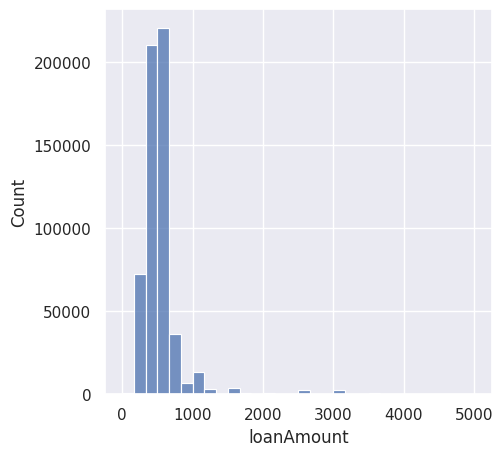

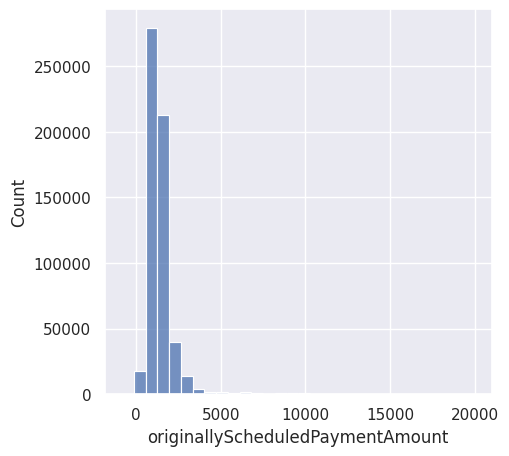

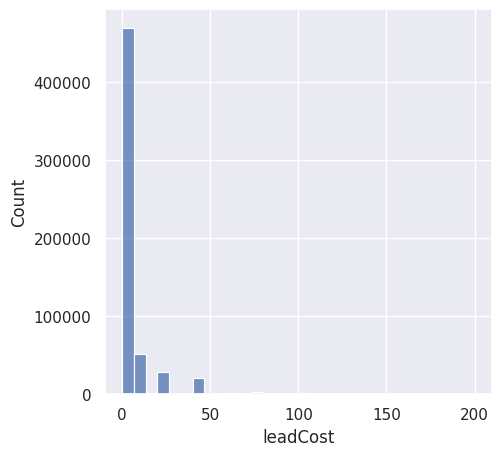

In [55]:
sns.set(rc={"figure.figsize": (5, 5)})
sns.histplot(loan_df["loanAmount"], bins = 30)
plt.show()
sns.set(rc={"figure.figsize": (5, 5)})
sns.histplot(loan_df["originallyScheduledPaymentAmount"], bins = 30)
plt.show()
sns.set(rc={"figure.figsize": (5, 5)})
sns.histplot(loan_df["leadCost"], bins = 30)
plt.show()

After analyzing numerical data, we will analyze the categorical attributes.

In [56]:
print(loan_df["payFrequency"].value_counts())

payFrequency
B    316654
W    137188
M     59092
I     33787
S     29688
Name: count, dtype: int64


In [57]:
print(loan_df["state"].value_counts())

state
OH         90496
IL         66710
TX         49729
MO         49249
WI         40349
MI         34635
TN         32991
NC         26962
FL         25896
IN         25781
SC         23925
CA         22691
NV         11477
PA          9723
VA          9197
NJ          7641
UT          6742
AL          4327
MS          3786
CO          3615
LA          3431
AZ          3355
NM          3231
KY          2911
SD          2212
MN          2078
GA          1763
OK          1758
WY          1715
CT          1468
WA          1384
KS          1227
IA          1043
DE           880
ID           722
RI           689
NE           635
HI           621
AK           290
ND           207
NY             3
MD             3
OH-TEST        1
TX-TEST        1
Name: count, dtype: int64


In [58]:
print(loan_df["leadType"].value_counts())

leadType
bvMandatory      475001
lead              72673
organic           22851
prescreen          4515
rc_returning       2069
california          479
lionpay              26
repeat               24
instant-offer        22
express              22
Name: count, dtype: int64


In [59]:
print(loan_df["fpStatus"].value_counts())

fpStatus
Checked        32978
No Payments    11427
Rejected        5522
No Schedule     1323
Cancelled        249
Skipped          218
Pending            5
Returned           1
Name: count, dtype: int64


To see the distribution of the categorical attribute, we will visualize the categorical data by using countplot.

<Axes: xlabel='payFrequency', ylabel='count'>

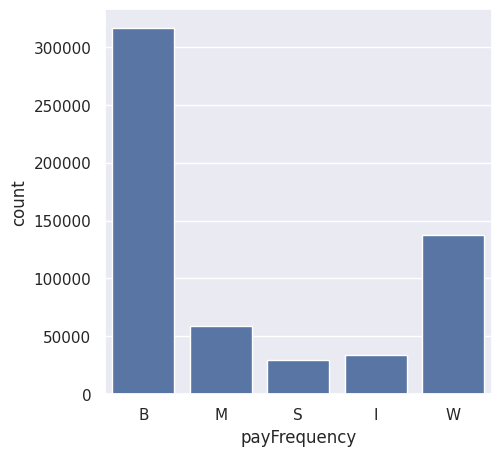

In [60]:
sns.countplot(x = loan_df["payFrequency"], data = loan_df)

After analyzing categorical data, we will analyze the targeted variable *loanStatus*.

In [61]:
print(loan_df["loanStatus"].value_counts())

loanStatus
Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Charged Off                         1
Customver Voided New Loan           1
Settlement Pending Paid Off         1
Name: count, dtype: int64


##4. Data Preprocessing

### Feature Engineering

In [62]:
X = loan_df.drop(columns=['loanId', 'anon_ssn', 'applicationDate', 'originatedDate', 'loanStatus', 'clarityFraudId', 'hasCF'], axis=1)
y = loan_df['loanStatus']

In [63]:
valid_columns = X.columns
print(valid_columns)

Index(['payFrequency', 'apr', 'originated', 'nPaidOff', 'approved', 'isFunded',
       'loanAmount', 'originallyScheduledPaymentAmount', 'state', 'leadType',
       'leadCost', 'fpStatus'],
      dtype='object')


In [64]:
print('Shape of original dataset, train:', loan_df.shape)
print('X shape:', X.shape, 'type=', type(X))
print('y shape:', y.shape, 'type=', type(y))

Shape of original dataset, train: (577682, 19)
X shape: (577682, 12) type= <class 'pandas.core.frame.DataFrame'>
y shape: (577682,) type= <class 'pandas.core.series.Series'>


In [65]:
X_num = X.drop(["payFrequency", "state", "leadType", "fpStatus"], axis=1)
X_cat = X[["payFrequency", "state", "leadType", "fpStatus"]]

print('X_num shape:', X_num.shape)
print('X_cat shape:', X_cat.shape)

X_num shape: (577682, 8)
X_cat shape: (577682, 4)


### Handle missing values

In [66]:
print("Number of missing values for all X_num columns:")
X_num.isnull().sum()

Number of missing values for all X_num columns:


apr                                 3922
originated                             0
nPaidOff                              24
approved                               0
isFunded                               0
loanAmount                          2250
originallyScheduledPaymentAmount       0
leadCost                               0
dtype: int64

In [67]:
numeric_columns = ['apr', 'nPaidOff', 'loanAmount']
X_num[numeric_columns] = X_num[numeric_columns].fillna(0)

In [68]:
X_num.isnull().sum()

apr                                 0
originated                          0
nPaidOff                            0
approved                            0
isFunded                            0
loanAmount                          0
originallyScheduledPaymentAmount    0
leadCost                            0
dtype: int64

In [69]:
print("Number of missing values for all X_train_cat columns:")
X_cat.isnull().sum()

Number of missing values for all X_train_cat columns:


payFrequency      1273
state              132
leadType             0
fpStatus        525959
dtype: int64

In [70]:
X_cat.loc[:, 'payFrequency'] = X_cat['payFrequency'].fillna('N') # N - Not applicable

In [71]:
X_cat.loc[:, 'state'] = X_cat['state'].fillna('N') # N - Not applicable

In [72]:
X_cat.loc[:, 'fpStatus'] = X_cat['fpStatus'].fillna('None')

In [73]:
X_cat.isnull().sum()

payFrequency    0
state           0
leadType        0
fpStatus        0
dtype: int64

### Standardization for num dataset
 As observed earlier, the features in our input matrix have different scales. Some machine learning algorithm cannot handle features with varying scales very well. Therefore, we perform  standardization on the features so that all the features have a mean of 0 and a standard deviation of 1.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_num)
X_num_tr = scaler.transform(X_num)

print("Mean of all column:\n", X_num_tr.mean(axis=0))
print("Std of all column:\n", X_num_tr.std(axis=0))

Mean of all column:
 [-5.78414815e-16 -5.21515505e-18  3.91382627e-17 -2.75394626e-17
  1.21153956e-17 -8.51767659e-17 -4.88244292e-17 -3.27177180e-18]
Std of all column:
 [1. 1. 1. 1. 1. 1. 1. 1.]


### One-Hot Encoding
 Most machine learning can only handle numerical inputs. There are several categorical features in our dataset, namely payFrequency, state, leadType, and fpStatus. The categorical features are nominal data type since it has no order information. Therefore, the feature will be encoded using **one-hot encoding**.

In [75]:
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
lb_encoder.fit(X_cat["payFrequency"])
X_cat_payFrequency_tr = lb_encoder.transform(X_cat["payFrequency"]) # return as numpy

print('Shape of X_cat_payFrequency_tr:', X_cat_payFrequency_tr.shape, '\n')
print(X_cat_payFrequency_tr, '\n')
print('Possible values of payFrequency:\n', lb_encoder.classes_, '\n')

lb_encoder.fit(X_cat["state"])
X_cat_state_tr = lb_encoder.transform(X_cat["state"]) # return as numpy

print('Shape of X_cat_state_tr:', X_cat_state_tr.shape, '\n')
print(X_cat_state_tr, '\n')
print('Possible values of state:\n', lb_encoder.classes_, '\n')

lb_encoder.fit(X_cat["leadType"])
X_cat_leadType_tr = lb_encoder.transform(X_cat["leadType"]) # return as numpy

print('Shape of X_cat_leadType_tr:', X_cat_leadType_tr.shape, '\n')
print(X_cat_leadType_tr, '\n')
print('Possible values of leadType:\n', lb_encoder.classes_, '\n')

lb_encoder.fit(X_cat["fpStatus"])
X_cat_fpStatus_tr = lb_encoder.transform(X_cat["fpStatus"]) # return as numpy

print('Shape of X_cat_fpStatus_tr:', X_cat_fpStatus_tr.shape, '\n')
print(X_cat_fpStatus_tr, '\n')
print('Possible values of fpStatus:\n', lb_encoder.classes_, '\n')

Shape of X_cat_payFrequency_tr: (577682, 6) 

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]] 

Possible values of payFrequency:
 ['B' 'I' 'M' 'N' 'S' 'W'] 

Shape of X_cat_state_tr: (577682, 45) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Possible values of state:
 ['AK' 'AL' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN'
 'KS' 'KY' 'LA' 'MD' 'MI' 'MN' 'MO' 'MS' 'N' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NV'
 'NY' 'OH' 'OH-TEST' 'OK' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'TX-TEST' 'UT'
 'VA' 'WA' 'WI' 'WY'] 

Shape of X_cat_leadType_tr: (577682, 10) 

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]] 

Possible values of leadType:
 ['bvMandatory' 'california' 'express' 'instant-offer' 'lead' 'lionpay'
 'organic' 'prescreen' 'rc_returning' 'repeat'] 

Shape of X_cat_fpStatus_tr: (577682, 9) 

[[0 0 

In [76]:
X_cat_tr = np.hstack([X_cat_payFrequency_tr, X_cat_state_tr, X_cat_leadType_tr, X_cat_fpStatus_tr])
print(X_cat_tr)
print(X_cat_tr.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(577682, 70)


In [77]:
print("Number of missing values for all y column:")
y.isnull().sum()

Number of missing values for all y column:


391

In [78]:
y.fillna('Not Available', inplace=True)
y.isnull().sum()

0

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_tr = le.transform(y) # return as numpy

print('Shape of y_tr:', y_tr.shape, '\n')
print(y_tr, '\n')
print('Possible values of loan status:\n', le.classes_, '\n')

Shape of y_tr: (577682,) 

[21 10 21 ... 21 21 15] 

Possible values of loan status:
 ['CSR Voided New Loan' 'Charged Off' 'Charged Off Paid Off'
 'Credit Return Void' 'Customer Voided New Loan'
 'Customver Voided New Loan' 'External Collection' 'Internal Collection'
 'New Loan' 'Not Available' 'Paid Off Loan' 'Pending Application'
 'Pending Application Fee' 'Pending Paid Off' 'Pending Rescind' 'Rejected'
 'Returned Item' 'Settled Bankruptcy' 'Settlement Paid Off'
 'Settlement Pending Paid Off' 'Voided New Loan' 'Withdrawn Application'] 



In [80]:
X_tr = np.hstack([X_num_tr, X_cat_tr])
print('X_tr shape:', X_tr.shape)
print('y_tr shape:', y_tr.shape)

X_tr shape: (577682, 78)
y_tr shape: (577682,)


### Split the dataset into training and testing set
 After cleaning and transforming our data, we can now split the dataset into training and testing set using **Random Sampling**.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=3)
print ('Full set shape:', X_tr.shape)
print ('X train set shape:', X_train.shape)
print ('X test set shape:', X_test.shape)
print ('y train set shape:', y_train.shape)
print ('y test set shape:', y_test.shape)

Full set shape: (577682, 78)
X train set shape: (462145, 78)
X test set shape: (115537, 78)
y train set shape: (462145,)
y test set shape: (115537,)


## 5. Model Training and Validation

In [82]:
def peek_results(actual, predicted, num = 20):
    print("actual", "\t|", "Predicted")
    print("------------------")
    for _ in range(num):
        sel = np.random.randint(0, len(actual))
        actual_label = le.inverse_transform([actual[sel]])[0]
        predicted_label = le.inverse_transform([predicted[sel]])[0]
        print(actual_label, "\t|", predicted_label)

In [83]:
import lightgbm as lgb

params = {
  'boosting_type': 'gbdt',  # default
  'num_leaves': 31,  # default
  'max_depth':-1,
  'n_estimators': 50,  # default = 100
  'learning_rate': 0.05,  # default = 0.10
  'min_data_in_leaf': 5,  # default = 20
  'random_state': 30,
  'verbosity': -1
}

model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, min_data_in_leaf=5, n_estimators=50,
               random_state=30, verbosity=-1)

In [84]:
y_pred_train = model.predict(X_train)
peek_results(y_train, y_pred_train)

actual 	| Predicted
------------------
Rejected 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Rejected 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
External Collection 	| Paid Off Loan
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Rejected 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Rejected 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application


In [85]:
y_pred = model.predict(X_test)
peek_results(y_test, y_pred)

actual 	| Predicted
------------------
New Loan 	| Paid Off Loan
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Rejected 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Rejected 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application
Withdrawn Application 	| Withdrawn Application


In [86]:
def accuracy(model, X_data, y_data):
  preds = model.predict(X_data)  # all predicted values
  n_correct = np.sum(preds == y_data)
  result = n_correct / len(X_data)
  return result

In [87]:
train_acc = accuracy(model, X_train, y_train)
print("\nAccuracy on training data = %0.4f " % train_acc)
test_acc = accuracy(model, X_test, y_test)
print("Accuracy on test data = %0.4f " % test_acc)


Accuracy on training data = 0.8534 
Accuracy on test data = 0.8505 


In [88]:
y_pred = model.predict(X_test)
print("Accuracy: %0.4f " % accuracy_score(y_test, y_pred))
print("Precision: %0.4f " % precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall: %0.4f " % recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score: %0.4f " % f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8505 
Precision: 0.8483 
Recall: 0.8505 
F1 Score: 0.8351 


## 6. Testing and Deployment

In [89]:
test_df = pd.read_csv("/content/loanTest.csv")
test_df.replace({'NA': np.nan, '': np.nan}, inplace=True)
test_df[boolean_column] = test_df[boolean_column].replace({True: 1, False: 0})

Xt = loan_df.drop(columns=['loanId', 'anon_ssn', 'applicationDate', 'originatedDate', 'loanStatus', 'clarityFraudId', 'hasCF'], axis=1)
yt = loan_df['loanStatus']

Xt_num = Xt.drop(["payFrequency", "state", "leadType", "fpStatus"], axis=1)
Xt_cat = Xt[["payFrequency", "state", "leadType", "fpStatus"]]

Xt_num[numeric_columns] = Xt_num[numeric_columns].fillna(0)
Xt_cat.loc[:, 'payFrequency'] = Xt_cat['payFrequency'].fillna('N') # N - Not applicable
Xt_cat.loc[:, 'state'] = Xt_cat['state'].fillna('N') # N - Not applicable
Xt_cat.loc[:, 'fpStatus'] = Xt_cat['fpStatus'].fillna('None')

Xt_num_tr = scaler.transform(Xt_num)

lb_encoder = LabelBinarizer()
lb_encoder.fit(Xt_cat["payFrequency"])
Xt_cat_payFrequency_tr = lb_encoder.transform(Xt_cat["payFrequency"]) # return as numpy

lb_encoder.fit(Xt_cat["state"])
Xt_cat_state_tr = lb_encoder.transform(Xt_cat["state"]) # return as numpy

lb_encoder.fit(Xt_cat["leadType"])
Xt_cat_leadType_tr = lb_encoder.transform(Xt_cat["leadType"]) # return as numpy

lb_encoder.fit(Xt_cat["fpStatus"])
Xt_cat_fpStatus_tr = lb_encoder.transform(Xt_cat["fpStatus"]) # return as numpy

Xt_cat_tr = np.hstack([Xt_cat_payFrequency_tr, Xt_cat_state_tr, Xt_cat_leadType_tr, Xt_cat_fpStatus_tr])
yt.fillna('Not Available', inplace=True)
le = LabelEncoder()
le.fit(yt)
yt_tr = le.transform(yt) # return as numpy
Xt_tr = np.hstack([Xt_num_tr, Xt_cat_tr])

yt_pred = model.predict(Xt_tr)
for i in range(5):
  actual_label = le.inverse_transform([yt_tr[i]])[0]
  predicted_label = le.inverse_transform([yt_pred[i]])[0]
  print("Test", i+1, ":")
  print('Actual label:', actual_label)
  print('Predicted label:', predicted_label)

Test 1 :
Actual label: Withdrawn Application
Predicted label: Withdrawn Application
Test 2 :
Actual label: Paid Off Loan
Predicted label: Paid Off Loan
Test 3 :
Actual label: Withdrawn Application
Predicted label: Withdrawn Application
Test 4 :
Actual label: Withdrawn Application
Predicted label: Withdrawn Application
Test 5 :
Actual label: Rejected
Predicted label: Withdrawn Application


In [90]:
import pickle
pth = "/content/loan_model.pkl"
with open(pth, "wb") as f:
  pickle.dump(model, f)
print("Model is saved!")

Model is saved!
